In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

In [2]:
data = np.genfromtxt("../../data/newdata/AllChiPurged.dat")

In [3]:
# Create dataframe for easier operations/manipulation
df = pd.DataFrame(data, columns = ['ustat','alph1','alph2', 'beta', 'chi'])
df.head()

,ustat,alph1,alph2,beta,chi
0,10.51030,2.34451,2.34451,60.0,3.280780
1,8.40821,2.34451,2.34451,60.0,1.094480
2,7.00684,2.34451,2.34451,60.0,0.840347
3,5.25513,2.34451,2.34451,60.0,0.772829
4,3.50342,2.34451,2.34451,60.0,0.811944


In [4]:
X_df = df.drop(['chi'], axis=1)
y_df = df[['chi']]

#### Transform Data

Power transforms refer to a class of techniques that use a power function (like a logarithm or exponent) to make the probability distribution of a variable Gaussian or more-Gaussian like. Yeo-Johnson is a type of power transform, in which input data does not have to be strictly positive.



In [5]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')    

In [6]:
# transform features
X_df = pt.fit_transform(X_df)
X_df = pd.DataFrame(X_df, columns = ['ustat','alph1','alph2', 'beta'])

In [7]:
X_df.head()

,ustat,alph1,alph2,beta
0,1.451543,0.265357,-0.114683,0.374668
1,1.167688,0.265357,-0.114683,0.374668
2,0.938510,0.265357,-0.114683,0.374668
3,0.583947,0.265357,-0.114683,0.374668
4,0.104986,0.265357,-0.114683,0.374668


array([[<AxesSubplot:xlabel='ustat', ylabel='ustat'>,
        <AxesSubplot:xlabel='alph1', ylabel='ustat'>,
        <AxesSubplot:xlabel='alph2', ylabel='ustat'>,
        <AxesSubplot:xlabel='beta', ylabel='ustat'>],
       [<AxesSubplot:xlabel='ustat', ylabel='alph1'>,
        <AxesSubplot:xlabel='alph1', ylabel='alph1'>,
        <AxesSubplot:xlabel='alph2', ylabel='alph1'>,
        <AxesSubplot:xlabel='beta', ylabel='alph1'>],
       [<AxesSubplot:xlabel='ustat', ylabel='alph2'>,
        <AxesSubplot:xlabel='alph1', ylabel='alph2'>,
        <AxesSubplot:xlabel='alph2', ylabel='alph2'>,
        <AxesSubplot:xlabel='beta', ylabel='alph2'>],
       [<AxesSubplot:xlabel='ustat', ylabel='beta'>,
        <AxesSubplot:xlabel='alph1', ylabel='beta'>,
        <AxesSubplot:xlabel='alph2', ylabel='beta'>,
        <AxesSubplot:xlabel='beta', ylabel='beta'>]], dtype=object)

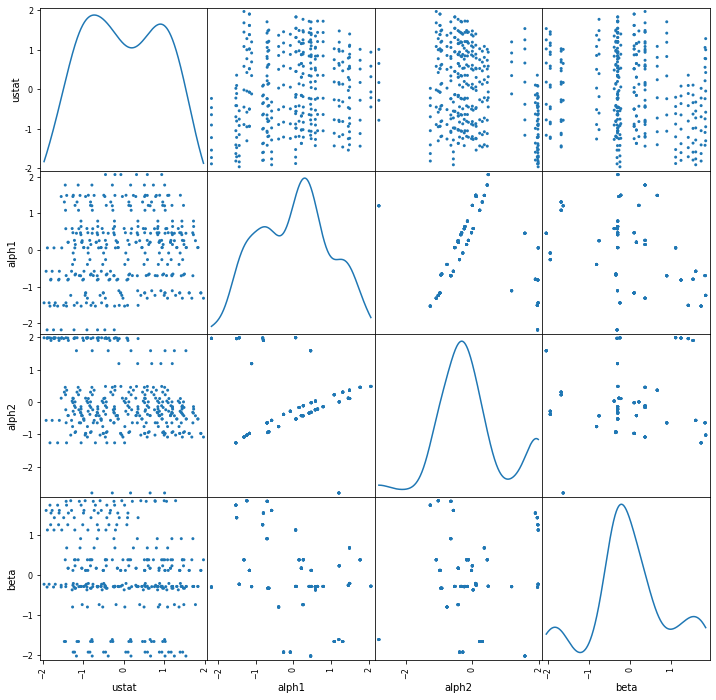

In [8]:
pd.plotting.scatter_matrix(X_df, alpha = 1, figsize = (12, 12), diagonal = 'kde')

The power transform was successful in making the data more Gaussian-like, shown by the KDE.

#### Three Dimensional Scatter for Features

Three dimensional scatterplots with x, y, and z as features. Want to see what the transformed scatter looks like.

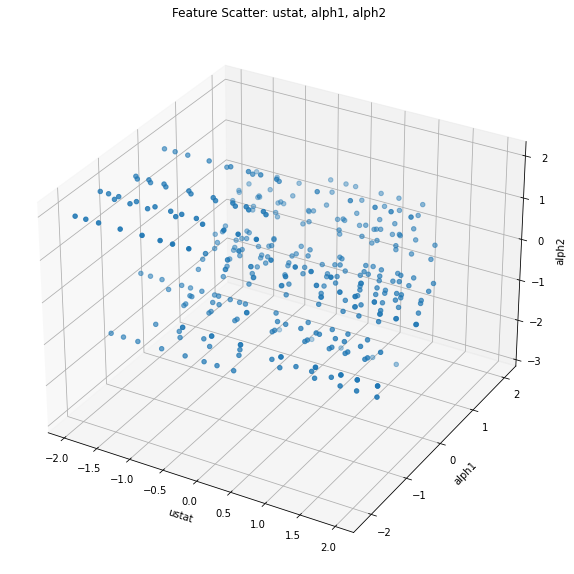

In [9]:
x = X_df['ustat']
y = X_df['alph1']
z = X_df['alph2']


fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(x, y, z)

ax.set_title('Feature Scatter: ustat, alph1, alph2')
ax.set_xlabel('ustat')
ax.set_ylabel('alph1')
ax.set_zlabel('alph2')
 
plt.show()

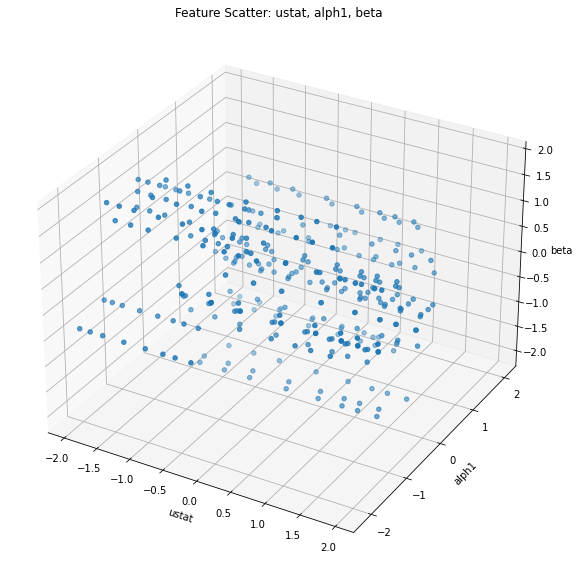

In [10]:
x = X_df['ustat']
y = X_df['alph1']
z = X_df['beta']


fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(x, y, z)

ax.set_title('Feature Scatter: ustat, alph1, beta')
ax.set_xlabel('ustat')
ax.set_ylabel('alph1')
ax.set_zlabel('beta')
 
plt.show()

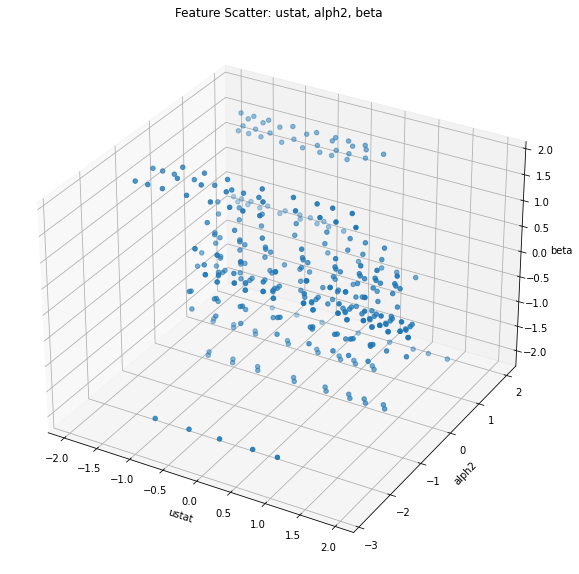

In [11]:
x = X_df['ustat']
y = X_df['alph2']
z = X_df['beta']


fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(x, y, z)

ax.set_title('Feature Scatter: ustat, alph2, beta')
ax.set_xlabel('ustat')
ax.set_ylabel('alph2')
ax.set_zlabel('beta')
 
plt.show()

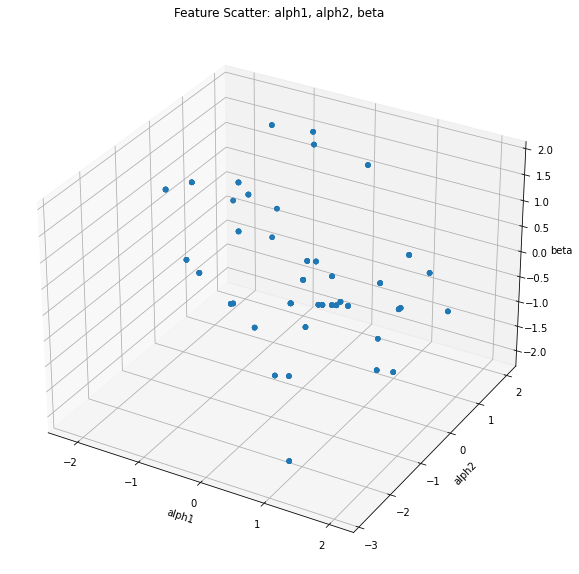

In [12]:
x = X_df['alph1']
y = X_df['alph2']
z = X_df['beta']


fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(x, y, z)

ax.set_title('Feature Scatter: alph1, alph2, beta')
ax.set_xlabel('alph1')
ax.set_ylabel('alph2')
ax.set_zlabel('beta')
 
plt.show()

In [13]:
from sklearn.cluster import KMeans

In [15]:
# elbow method: heuristic used in determining the number of clusters in a data set
# SSE/intertia: sum of the squared distance between the average point (called Centroid) and each point of the cluster

def elbow_method(X):
    error = []
    for i in range(1,11):
        k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
        k_means.fit(X)
        # Sum of squared distances of samples to their closest cluster center, 
        # weighted by the sample weights if provided.
        error.append(k_means.inertia_)
    #plot elbow curve
    plt.plot(np.arange(1,11), error)
    plt.xlabel('k')
    plt.ylabel('Sum of Square Error (SSE)')
    plt.show()

k-Means clustering method will be used for finding clusters among the scatter data. The elbow method will be used to determine the optimal value of k (the number of clusters). 

In [17]:
# extract three features/columns
# ustat, alph1, alph2
X = X_df.iloc[:,[True, True, True, False]].values

C:\Users\jeffr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


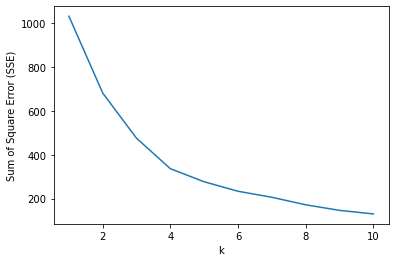

In [18]:
elbow_method(X)

In [19]:
# select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion

In [20]:
# predict labels for K = 4 clusters
km = KMeans(n_clusters = 4, init = 'k-means++',  random_state=42)
y = km.fit_predict(X)

In [21]:
# labels
data1 = X_df[y==0]
data2 = X_df[y==1]
data3 = X_df[y==2]
data4 = X_df[y==3]

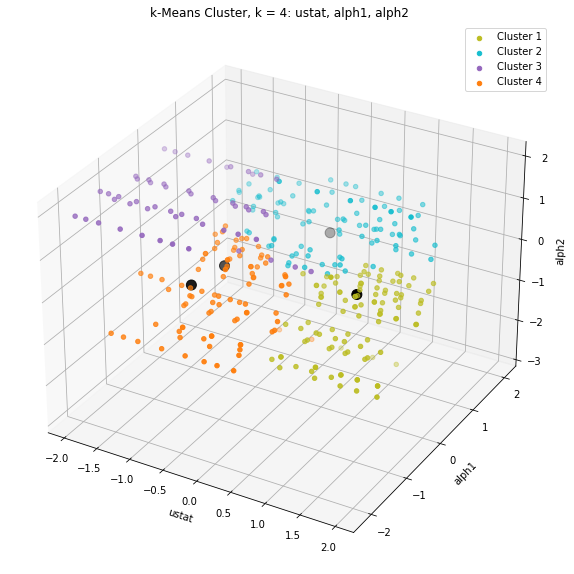

In [22]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")



# Data for three-dimensional scattered points
ax.scatter3D(data1['ustat'], data1['alph1'], data1['alph2'], c='tab:olive', label = 'Cluster 1')

ax.scatter3D(data2['ustat'],data2['alph1'],data2['alph2'],c ='tab:cyan', label = 'Cluster 2')

ax.scatter3D(data3['ustat'], data3['alph1'], data3['alph2'], c='tab:purple', label = 'Cluster 3')

ax.scatter3D(data4['ustat'],data4['alph1'],data4['alph2'],c ='tab:orange', label = 'Cluster 4')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'black', s = 100)

ax.set_title('k-Means Cluster, k = 4: ustat, alph1, alph2')
ax.set_xlabel('ustat')
ax.set_ylabel('alph1')
ax.set_zlabel('alph2')

plt.legend()
plt.show()

In [23]:
# ustat, alph1, beta
X = X_df.iloc[:,[True, True, False, True]].values

C:\Users\jeffr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


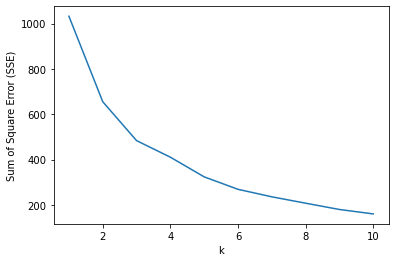

In [24]:
elbow_method(X)

In [25]:
# predict labels for K = 3 clusters
km = KMeans(n_clusters = 3, init = 'k-means++',  random_state=42)
y = km.fit_predict(X)

In [26]:
# labels
data1 = X_df[y==0]
data2 = X_df[y==1]
data3 = X_df[y==2]

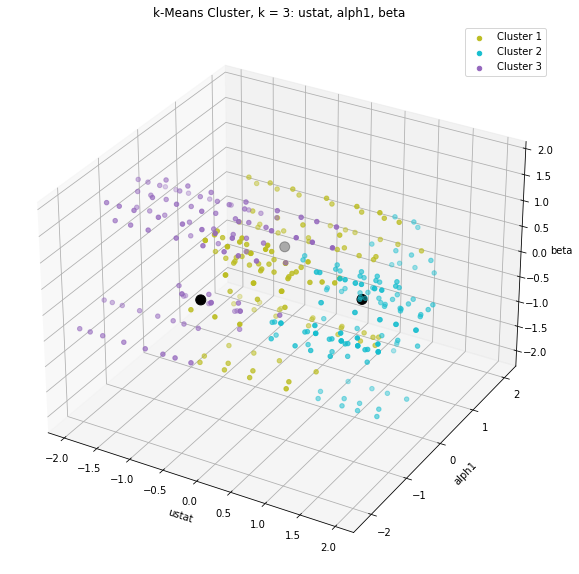

In [27]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")



# Data for three-dimensional scattered points
ax.scatter3D(data1['ustat'], data1['alph1'], data1['beta'], c='tab:olive', label = 'Cluster 1')

ax.scatter3D(data2['ustat'],data2['alph1'],data2['beta'],c ='tab:cyan', label = 'Cluster 2')

ax.scatter3D(data3['ustat'], data3['alph1'], data3['beta'], c='tab:purple', label = 'Cluster 3')


plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'black', s = 100)

ax.set_title('k-Means Cluster, k = 3: ustat, alph1, beta')
ax.set_xlabel('ustat')
ax.set_ylabel('alph1')
ax.set_zlabel('beta')

plt.legend()
plt.show()

In [28]:
# ustat, alph2, beta
X = X_df.iloc[:,[True, False, True, True]].values

C:\Users\jeffr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


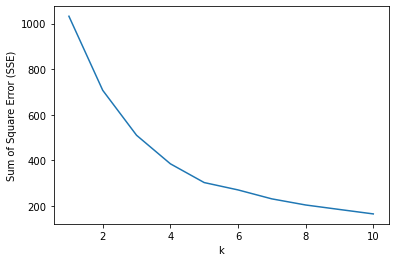

In [29]:
elbow_method(X)

In [30]:
# predict labels for K = 5 clusters
km = KMeans(n_clusters = 5, init = 'k-means++',  random_state=42)
y = km.fit_predict(X)

In [31]:
# labels
data1 = X_df[y==0]
data2 = X_df[y==1]
data3 = X_df[y==2]
data4 = X_df[y==3]
data5 = X_df[y==4]

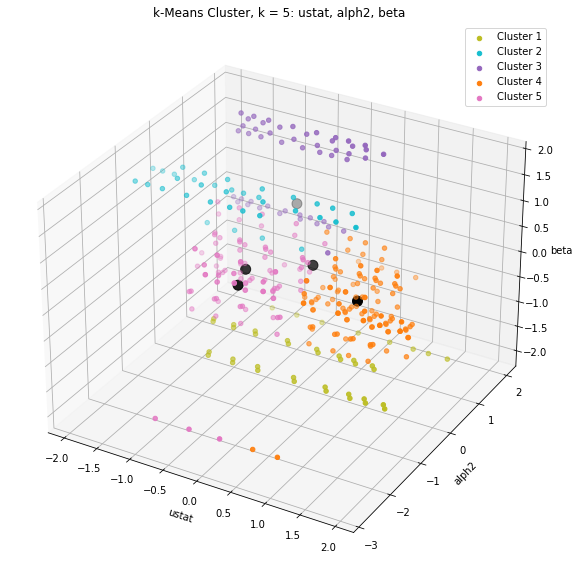

In [32]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")



# Data for three-dimensional scattered points
ax.scatter3D(data1['ustat'], data1['alph2'], data1['beta'], c='tab:olive', label = 'Cluster 1')

ax.scatter3D(data2['ustat'],data2['alph2'],data2['beta'],c ='tab:cyan', label = 'Cluster 2')

ax.scatter3D(data3['ustat'], data3['alph2'], data3['beta'], c='tab:purple', label = 'Cluster 3')

ax.scatter3D(data4['ustat'], data4['alph2'], data4['beta'], c='tab:orange', label = 'Cluster 4')

ax.scatter3D(data5['ustat'], data5['alph2'], data5['beta'], c='tab:pink', label = 'Cluster 5')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'black', s = 100)

ax.set_title('k-Means Cluster, k = 5: ustat, alph2, beta')
ax.set_xlabel('ustat')
ax.set_ylabel('alph2')
ax.set_zlabel('beta')

plt.legend()
plt.show()

In [33]:
# alph1, alph2, beta
X = X_df.iloc[:,[False, True, True, True]].values

C:\Users\jeffr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


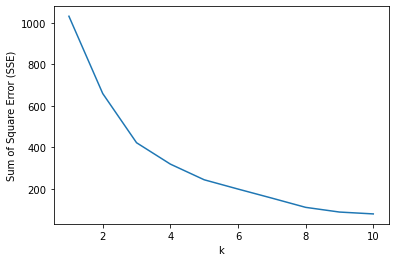

In [34]:
elbow_method(X)

In [35]:
# predict labels for K = 3 clusters
km = KMeans(n_clusters = 3, init = 'k-means++',  random_state=42)
y = km.fit_predict(X)

In [36]:
# labels
data1 = X_df[y==0]
data2 = X_df[y==1]
data3 = X_df[y==2]

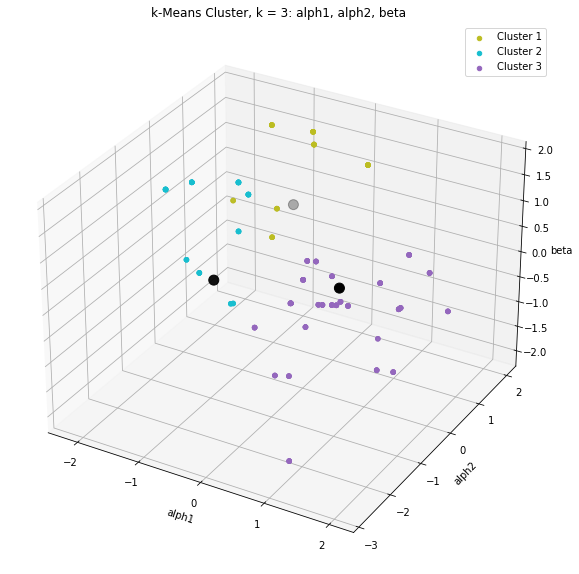

In [37]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")



# Data for three-dimensional scattered points
ax.scatter3D(data1['alph1'], data1['alph2'], data1['beta'], c='tab:olive', label = 'Cluster 1')

ax.scatter3D(data2['alph1'],data2['alph2'],data2['beta'],c ='tab:cyan', label = 'Cluster 2')

ax.scatter3D(data3['alph1'], data3['alph2'], data3['beta'], c='tab:purple', label = 'Cluster 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'black', s = 100)

ax.set_title('k-Means Cluster, k = 3: alph1, alph2, beta')
ax.set_xlabel('alph1')
ax.set_ylabel('alph2')
ax.set_zlabel('beta')

plt.legend()
plt.show()

k-Means clustering produces reasonable clusters among the scattering data. The next steps would be to examine the relationship of chi among the clusters. If there is a relationship, then we can possibly use the clusters as labels.

In [38]:
# 1) separate data clusters into seaprate plots
#2) display chi values
#3) see relationship between clusters and chi
# report